In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import rcParams
import seaborn as sns
from sklearn import preprocessing

In [4]:
rcParams['figure.figsize'] = 8, 5
plt.rc('grid', linestyle="--", color='gray')

# https://learnui.design/tools/data-color-picker.html#palette
colors = ['#33508f', '#ff5d68', '#ffa600','#af4f9b']

In [5]:
results = pd.read_csv("results_anonymized_bala3.csv")
results.head()

,ED/ES,Vendor,Centre,Dice LV,Jaccard LV,Hausdorff LV,ASSD LV,Dice RV,Jaccard RV,Hausdorff RV,ASSD RV,Dice MYO,Jaccard MYO,Hausdorff MYO,ASSD MYO
0,ES,D,5,0.793957,0.658315,10.613972,0.916034,0.785918,0.647335,10.761994,0.974868,0.839218,0.722976,10.965867,1.162639
1,ES,A,1,0.930360,0.869787,11.930365,0.278397,0.968736,0.939369,4.250000,0.161029,0.907580,0.830797,6.335526,0.225613
2,ED,A,1,0.936024,0.879742,10.215728,0.441137,0.977829,0.956620,5.666667,0.128398,0.898350,0.815459,8.959786,0.265215
3,ED,A,6,0.907951,0.831420,10.274023,1.576736,0.966958,0.936030,4.714045,0.295269,0.840263,0.724528,8.975274,0.556980
4,ES,D,5,0.767751,0.623049,22.232638,1.619279,0.818959,0.693421,12.401198,2.276844,0.833190,0.714075,12.502840,1.452884


In [6]:
print("-- Segmentation scores --\n")
print("Min Jaccard LV: {:.4f} / Max Jaccard LV: {:.4f}".format(results["Jaccard LV"].min(), results["Jaccard LV"].max()))
print("Min Jaccard RV: {:.4f} / Max Jaccard RV: {:.4f}".format(results["Jaccard RV"].min(), results["Jaccard RV"].max()))
print("Min Jaccard MYO: {:.4f} / Max Jaccard MYO: {:.4f}".format(results["Jaccard MYO"].min(), results["Jaccard MYO"].max()))

print()
print("Min Dice LV: {:.4f} / Max Dice LV: {:.4f}".format(results["Dice LV"].min(), results["Dice LV"].max()))
print("Min Dice RV: {:.4f} / Max Dice RV: {:.4f}".format(results["Dice RV"].min(), results["Dice RV"].max()))
print("Min Dice MYO: {:.4f} / Max Dice MYO: {:.4f}".format(results["Dice MYO"].min(), results["Dice MYO"].max()))

print()
print("Min Hausdorff LV: {:.4f} / Max Hausdorff LV: {:.4f}".format(results["Hausdorff LV"].min(), results["Hausdorff LV"].max()))
print("Min Hausdorff RV: {:.4f} / Max Hausdorff RV: {:.4f}".format(results["Hausdorff RV"].min(), results["Hausdorff RV"].max()))
print("Min Hausdorff MYO: {:.4f} / Max Hausdorff MYO: {:.4f}".format(results["Hausdorff MYO"].min(), results["Hausdorff MYO"].max()))

print()
print("Min ASSD LV: {:.4f} / Max ASSD LV: {:.4f}".format(results["ASSD LV"].min(), results["ASSD LV"].max()))
print("Min ASSD RV: {:.4f} / Max ASSD RV: {:.4f}".format(results["ASSD RV"].min(), results["ASSD RV"].max()))
print("Min ASSD MYO: {:.4f} / Max ASSD MYO: {:.4f}".format(results["ASSD MYO"].min(), results["ASSD MYO"].max()))

-- Segmentation scores --

Min Jaccard LV: 0.1920 / Max Jaccard LV: 0.9566
Min Jaccard RV: 0.4854 / Max Jaccard RV: 0.9698
Min Jaccard MYO: 0.4461 / Max Jaccard MYO: 0.8726

Min Dice LV: 0.3221 / Max Dice LV: 0.9778
Min Dice RV: 0.6536 / Max Dice RV: 0.9847
Min Dice MYO: 0.6170 / Max Dice MYO: 0.9320

Min Hausdorff LV: 2.6440 / Max Hausdorff LV: 84.4537
Min Hausdorff RV: 2.0669 / Max Hausdorff RV: 51.5087
Min Hausdorff MYO: 3.2609 / Max Hausdorff MYO: 111.6666

Min ASSD LV: 0.1046 / Max ASSD LV: 12.5980
Min ASSD RV: 0.0872 / Max ASSD RV: 4.5034
Min ASSD MYO: 0.2096 / Max ASSD MYO: 6.3113


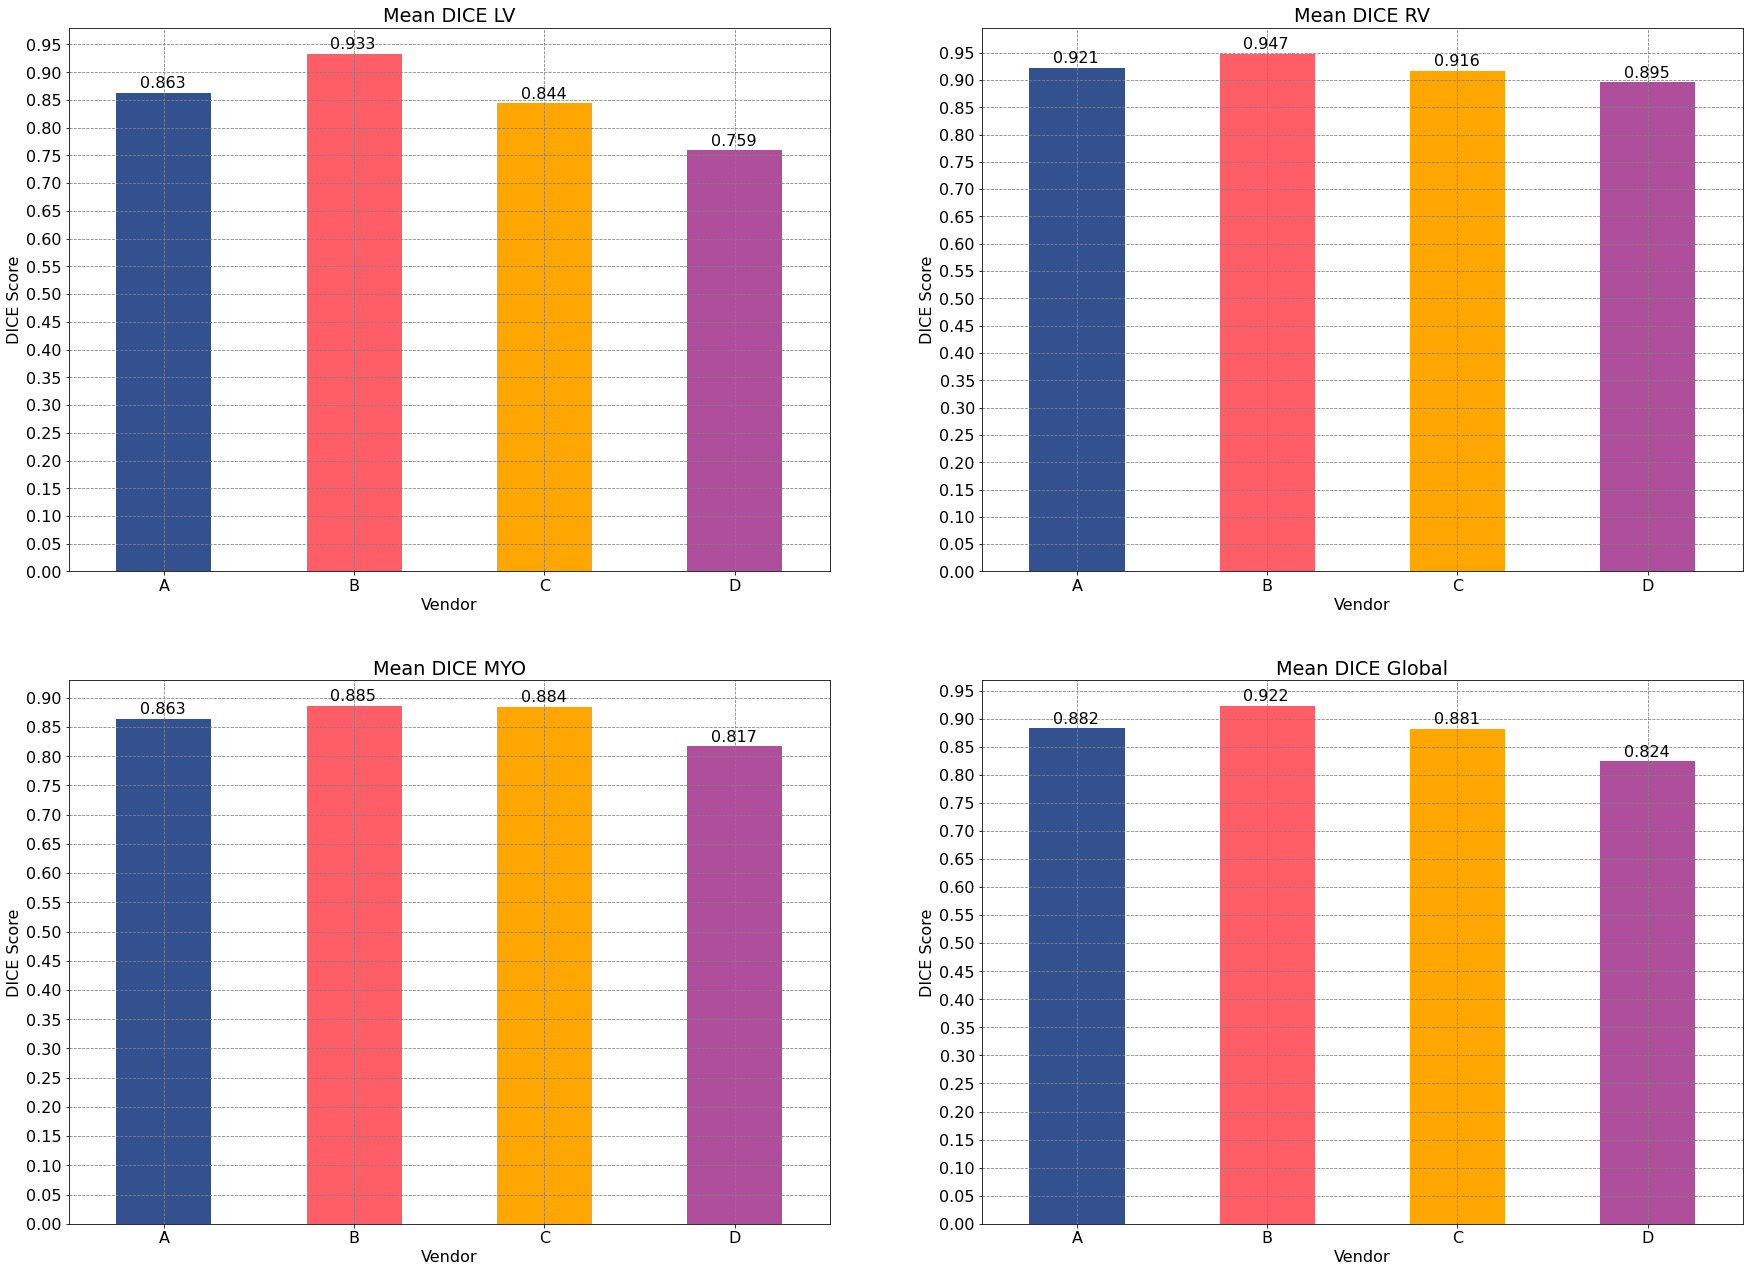

In [7]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 22))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Dice LV"].mean().plot.bar(color=colors, ax=ax1[0])
ax1[0].set_ylabel("DICE Score")
ax1[0].set_yticks(np.arange(0, results.groupby("Vendor")["Dice LV"].mean().max()+0.05, .05))
ax1[0].set_title("Mean DICE LV")
ax1[0].grid()
ax1[0].set_xticks( [ 0,1,2,3 ] )
ax1[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[0].patches:
    ax1[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Dice RV"].mean().plot.bar(color=colors, ax=ax1[1])
ax1[1].set_ylabel("DICE Score")
ax1[1].set_yticks(np.arange(0, results.groupby("Vendor")["Dice RV"].mean().max()+0.05, .05))
ax1[1].set_title("Mean DICE RV")
ax1[1].grid()
ax1[1].set_xticks( [ 0,1,2,3 ] )
ax1[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[1].patches:
    ax1[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Dice MYO"].mean().plot.bar(color=colors, ax=ax2[0])
ax2[0].set_ylabel("DICE Score")
ax2[0].set_yticks(np.arange(0, results.groupby("Vendor")["Dice MYO"].mean().max()+0.05, .05))
ax2[0].set_title("Mean DICE MYO")
ax2[0].grid()
ax2[0].set_xticks( [ 0,1,2,3 ] )
ax2[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[0].patches:
    ax2[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")[["Dice LV", "Dice RV", "Dice MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[1])
ax2[1].set_ylabel("DICE Score")
ax2[1].set_yticks(np.arange(0, results.groupby("Vendor")[["Dice LV", "Dice RV", "Dice MYO"]].mean().mean(axis=1).max()+0.05, .05))
ax2[1].set_title("Mean DICE Global")
ax2[1].grid()
ax2[1].set_xticks( [ 0,1,2,3 ] )
ax2[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[1].patches:
    ax2[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

plt.savefig('dice_vendor.png', bbox_inches='tight', dpi=160)

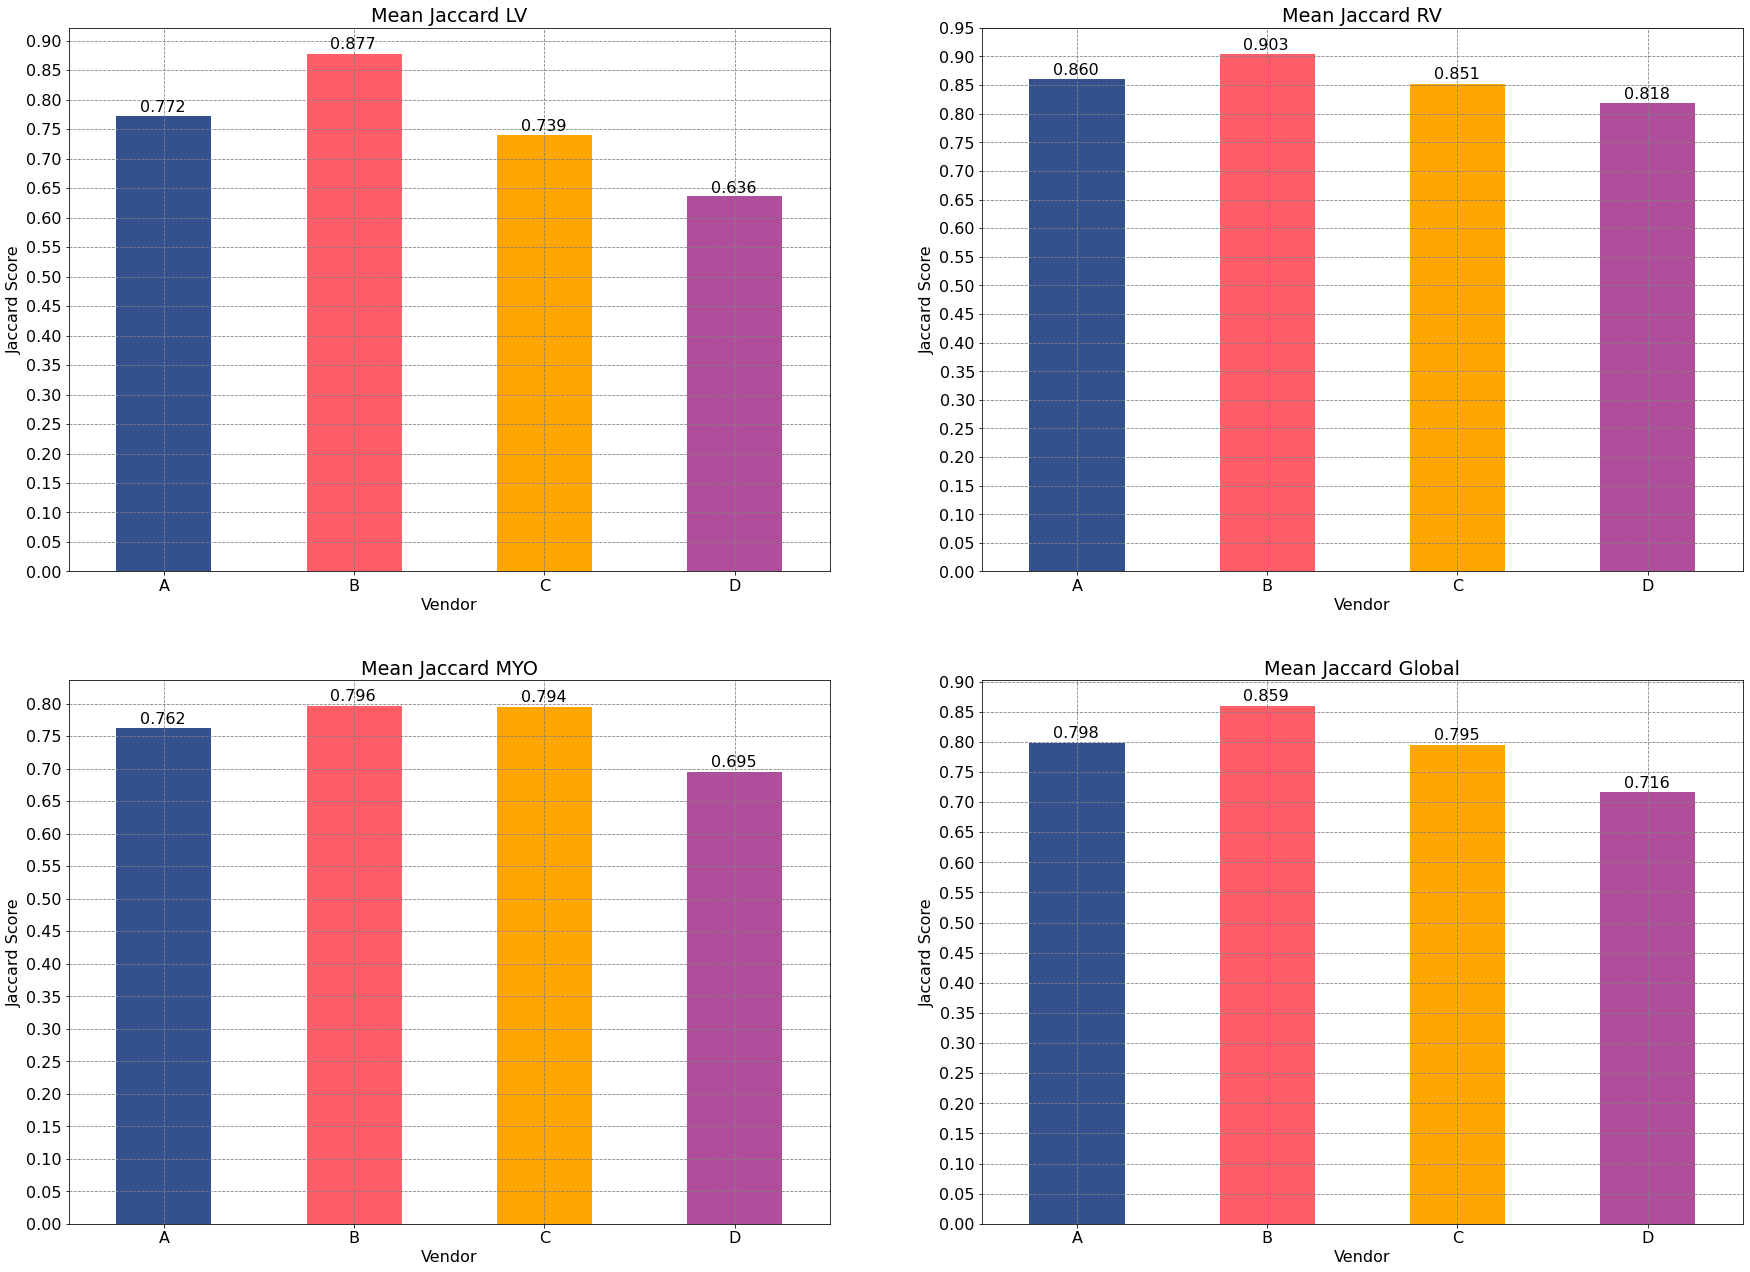

In [8]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 22))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Jaccard LV"].mean().plot.bar(color=colors, ax=ax1[0])
ax1[0].set_ylabel("Jaccard Score")
ax1[0].set_yticks(np.arange(0, results.groupby("Vendor")["Jaccard LV"].mean().max()+0.05, .05))
ax1[0].set_title("Mean Jaccard LV")
ax1[0].grid()
ax1[0].set_xticks( [ 0,1,2,3 ] )
ax1[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[0].patches:
    ax1[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Jaccard RV"].mean().plot.bar(color=colors, ax=ax1[1])
ax1[1].set_ylabel("Jaccard Score")
ax1[1].set_yticks(np.arange(0, results.groupby("Vendor")["Jaccard RV"].mean().max()+0.05, .05))
ax1[1].set_title("Mean Jaccard RV")
ax1[1].grid()
ax1[1].set_xticks( [ 0,1,2,3 ] )
ax1[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[1].patches:
    ax1[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")["Jaccard MYO"].mean().plot.bar(color=colors, ax=ax2[0])
ax2[0].set_ylabel("Jaccard Score")
ax2[0].set_yticks(np.arange(0, results.groupby("Vendor")["Jaccard MYO"].mean().max()+0.05, .05))
ax2[0].set_title("Mean Jaccard MYO")
ax2[0].grid()
ax2[0].set_xticks( [ 0,1,2,3 ] )
ax2[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[0].patches:
    ax2[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")[["Jaccard LV", "Jaccard RV", "Jaccard MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[1])
ax2[1].set_ylabel("Jaccard Score")
ax2[1].set_yticks(np.arange(0, results.groupby("Vendor")[["Jaccard LV", "Jaccard RV", "Jaccard MYO"]].mean().mean(axis=1).max()+0.05, .05))
ax2[1].set_title("Mean Jaccard Global")
ax2[1].grid()
ax2[1].set_xticks( [ 0,1,2,3 ] )
ax2[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[1].patches:
    ax2[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

plt.savefig('jaccard_vendor.png', bbox_inches='tight', dpi=160)

In [9]:
results.groupby("Vendor")["Hausdorff MYO"].mean().max()

19.331611048493496

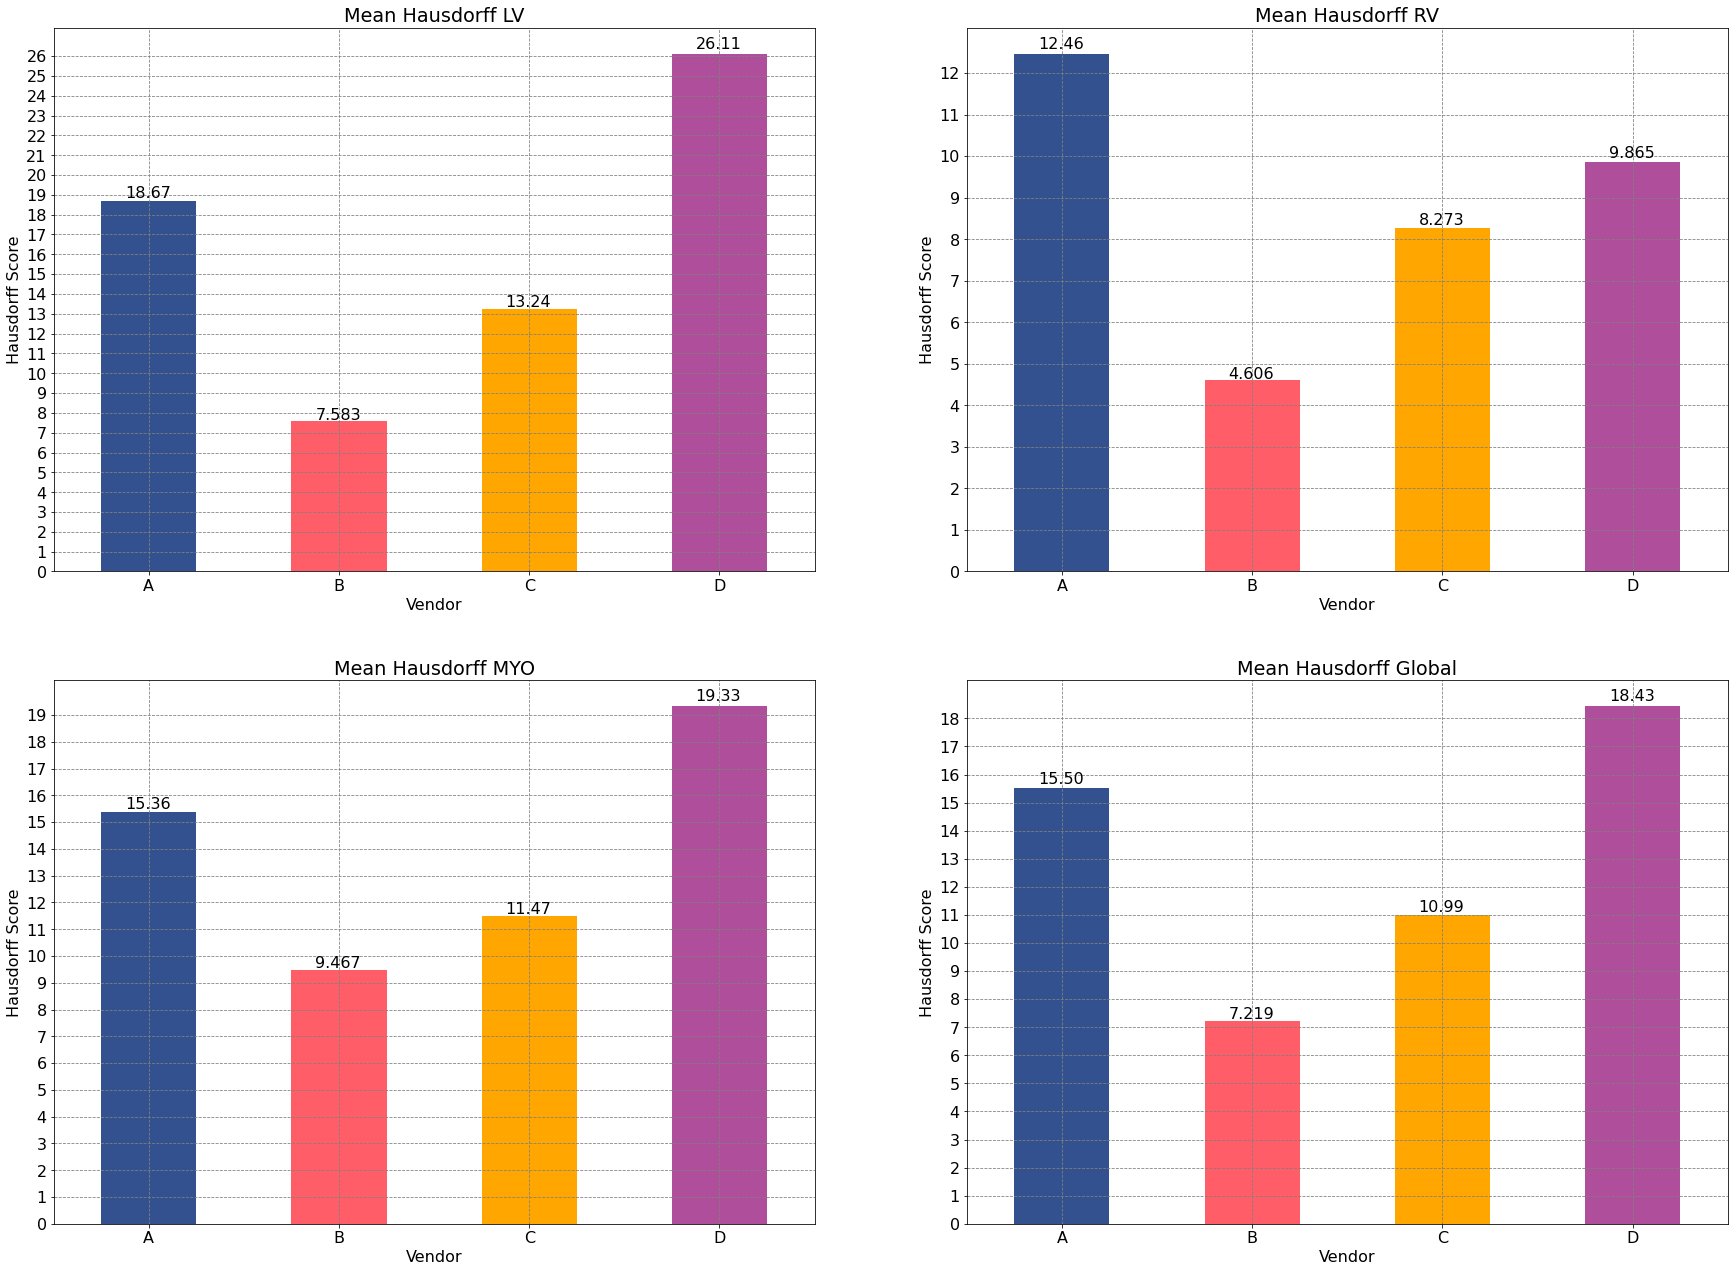

In [10]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 22))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Hausdorff LV"].mean().plot.bar(color=colors, ax=ax1[0])
ax1[0].set_ylabel("Hausdorff Score")
ax1[0].set_yticks(np.arange(0, results.groupby("Vendor")["Hausdorff LV"].mean().max()+0.05, 1))
ax1[0].set_title("Mean Hausdorff LV")
ax1[0].grid()
ax1[0].set_xticks( [ 0,1,2,3 ] )
ax1[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[0].patches:
    ax1[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")["Hausdorff RV"].mean().plot.bar(color=colors, ax=ax1[1])
ax1[1].set_ylabel("Hausdorff Score")
ax1[1].set_yticks(np.arange(0, results.groupby("Vendor")["Hausdorff RV"].mean().max()+0.05, 1))
ax1[1].set_title("Mean Hausdorff RV")
ax1[1].grid()
ax1[1].set_xticks( [ 0,1,2,3 ] )
ax1[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[1].patches:
    ax1[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")["Hausdorff MYO"].mean().plot.bar(color=colors, ax=ax2[0])
ax2[0].set_ylabel("Hausdorff Score")
ax2[0].set_yticks(np.arange(0, results.groupby("Vendor")["Hausdorff MYO"].mean().max()+0.05, 1))
ax2[0].set_title("Mean Hausdorff MYO")
ax2[0].grid()
ax2[0].set_xticks( [ 0,1,2,3 ] )
ax2[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[0].patches:
    ax2[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")[["Hausdorff LV", "Hausdorff RV", "Hausdorff MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[1])
ax2[1].set_ylabel("Hausdorff Score")
ax2[1].set_yticks(np.arange(0, results.groupby("Vendor")[["Hausdorff LV", "Hausdorff RV", "Hausdorff MYO"]].mean().mean(axis=1).max()+0.05, 1))
ax2[1].set_title("Mean Hausdorff Global")
ax2[1].grid()
ax2[1].set_xticks( [ 0,1,2,3 ] )
ax2[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[1].patches:
    ax2[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

plt.savefig('hausdorff_vendor.png', bbox_inches='tight', dpi=160)

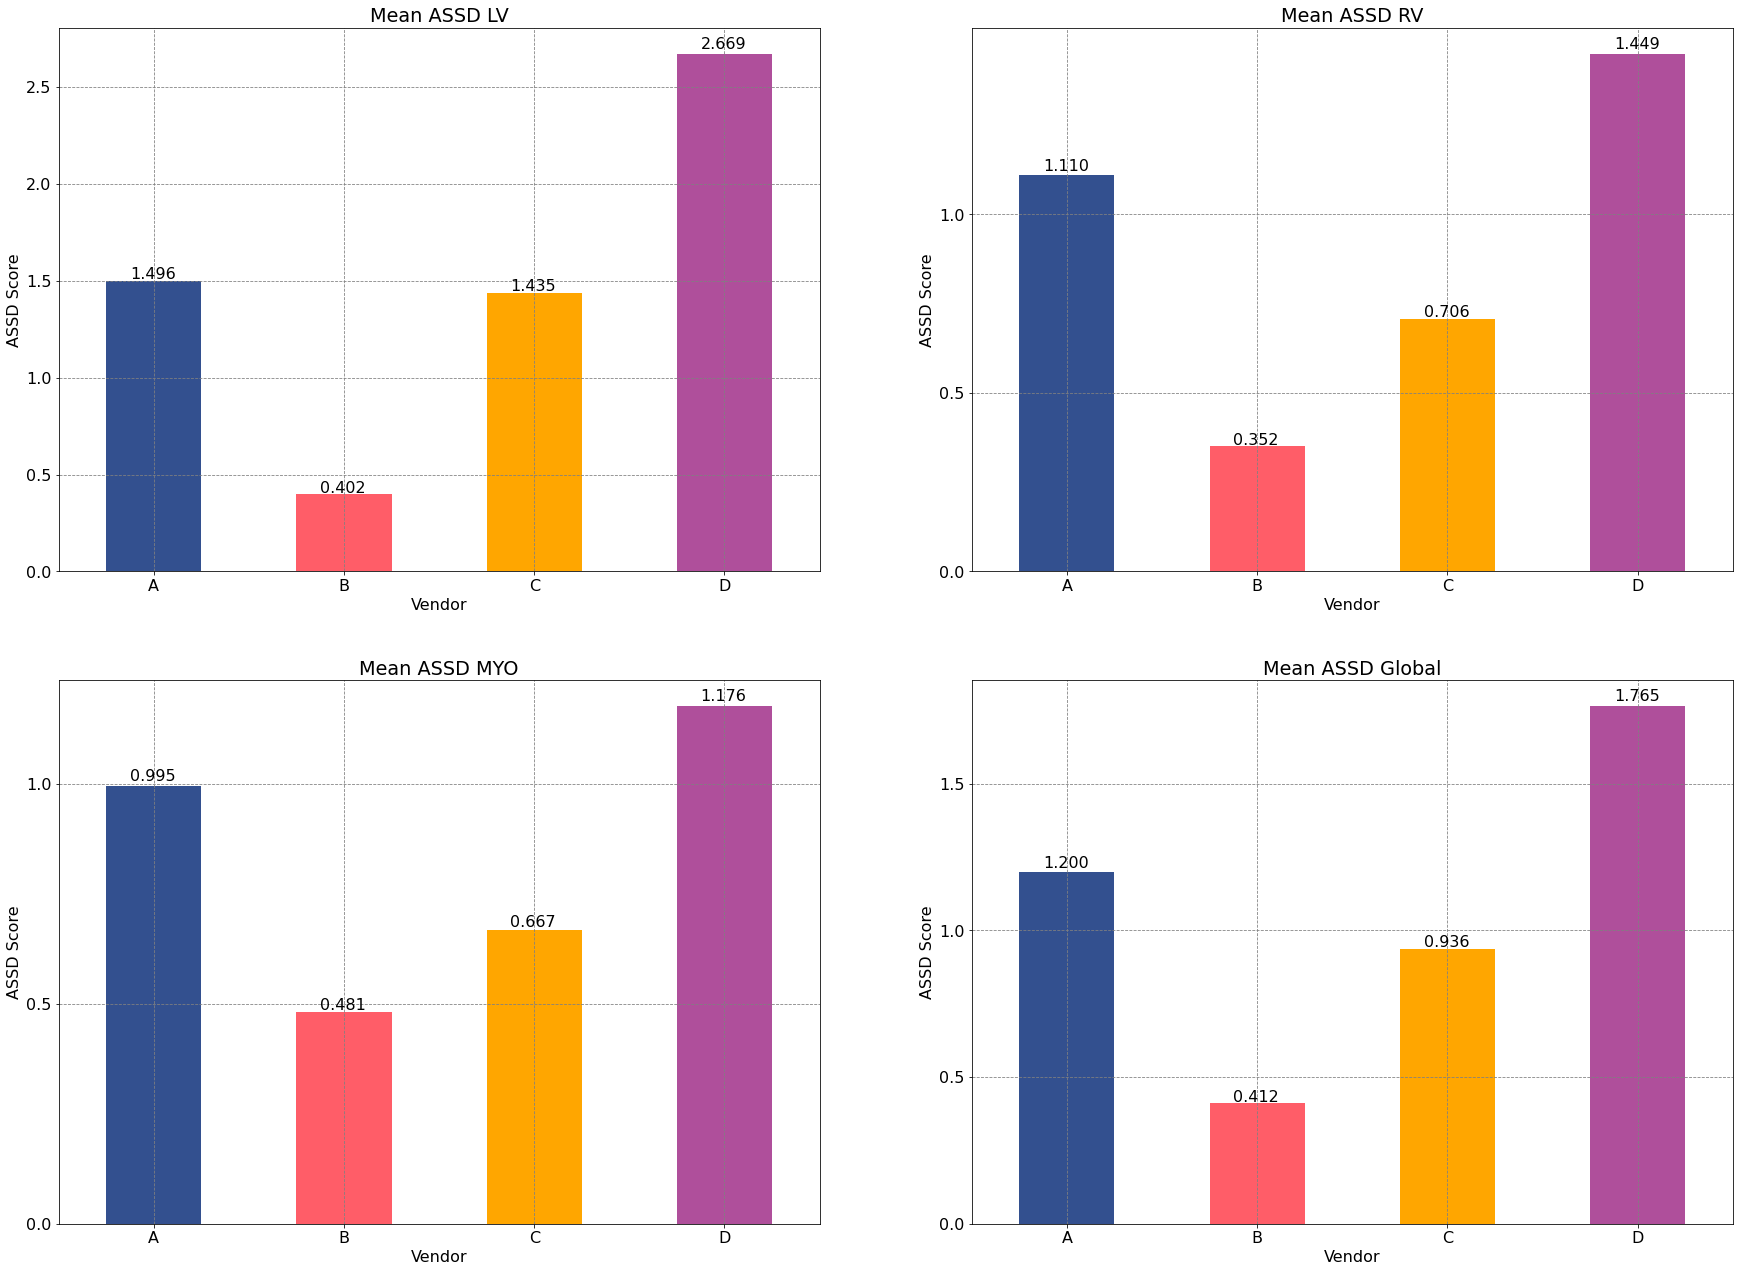

In [11]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 22))

# -------------------------------------------------------------- #
results.groupby("Vendor")["ASSD LV"].mean().plot.bar(color=colors, ax=ax1[0])
ax1[0].set_ylabel("ASSD Score")
ax1[0].set_yticks(np.arange(0, results.groupby("Vendor")["ASSD LV"].mean().max()+0.05, 0.5))
ax1[0].set_title("Mean ASSD LV")
ax1[0].grid()
ax1[0].set_xticks( [ 0,1,2,3 ] )
ax1[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[0].patches:
    ax1[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")["ASSD RV"].mean().plot.bar(color=colors, ax=ax1[1])
ax1[1].set_ylabel("ASSD Score")
ax1[1].set_yticks(np.arange(0, results.groupby("Vendor")["ASSD RV"].mean().max()+0.05, 0.5))
ax1[1].set_title("Mean ASSD RV")
ax1[1].grid()
ax1[1].set_xticks( [ 0,1,2,3 ] )
ax1[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[1].patches:
    ax1[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")["ASSD MYO"].mean().plot.bar(color=colors, ax=ax2[0])
ax2[0].set_ylabel("ASSD Score")
ax2[0].set_yticks(np.arange(0, results.groupby("Vendor")["ASSD MYO"].mean().max()+0.05, 0.5))
ax2[0].set_title("Mean ASSD MYO")
ax2[0].grid()
ax2[0].set_xticks( [ 0,1,2,3 ] )
ax2[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[0].patches:
    ax2[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")[["ASSD LV", "ASSD RV", "ASSD MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[1])
ax2[1].set_ylabel("ASSD Score")
ax2[1].set_yticks(np.arange(0, results.groupby("Vendor")[["ASSD LV", "ASSD RV", "ASSD MYO"]].mean().mean(axis=1).max()+0.05, 0.5))
ax2[1].set_title("Mean ASSD Global")
ax2[1].grid()
ax2[1].set_xticks( [ 0,1,2,3 ] )
ax2[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[1].patches:
    ax2[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

plt.savefig('assd_vendor.png', bbox_inches='tight', dpi=160)

#### Average results

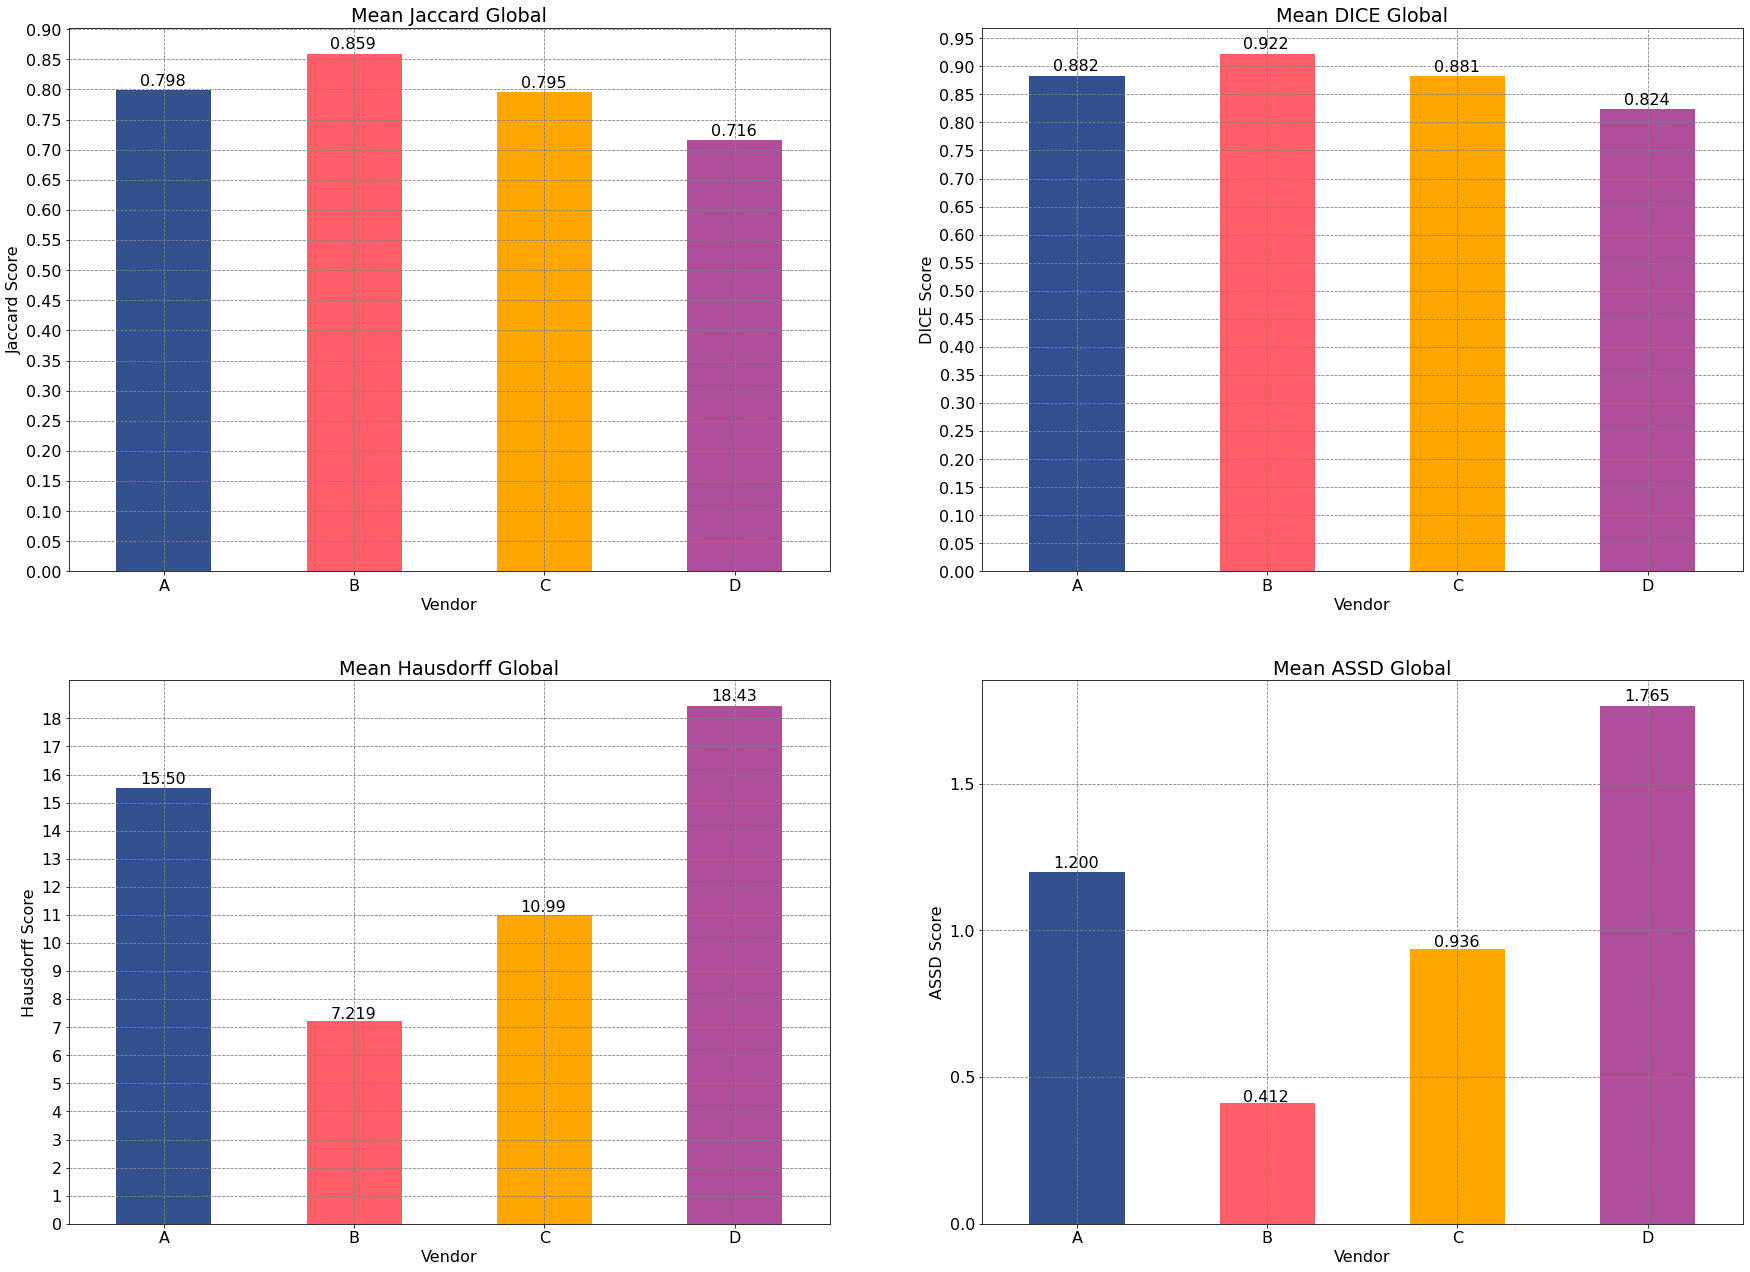

In [12]:
plt.rcParams.update({'font.size': 16})
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(30, 22))

# -------------------------------------------------------------- #
results.groupby("Vendor")[["Jaccard LV", "Jaccard RV", "Jaccard MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax1[0])
ax1[0].set_ylabel("Jaccard Score")
ax1[0].set_yticks(np.arange(0, results.groupby("Vendor")[["Jaccard LV", "Jaccard RV", "Jaccard MYO"]].mean().mean(axis=1).max()+0.05, .05))
ax1[0].set_title("Mean Jaccard Global")
ax1[0].grid()
ax1[0].set_xticks( [ 0,1,2,3 ] )
ax1[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[0].patches:
    ax1[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")[["Dice LV", "Dice RV", "Dice MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax1[1])
ax1[1].set_ylabel("DICE Score")
ax1[1].set_yticks(np.arange(0, results.groupby("Vendor")[["Dice LV", "Dice RV", "Dice MYO"]].mean().mean(axis=1).max()+0.05, .05))
ax1[1].set_title("Mean DICE Global")
ax1[1].grid()
ax1[1].set_xticks( [ 0,1,2,3 ] )
ax1[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax1[1].patches:
    ax1[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))


# -------------------------------------------------------------- #
results.groupby("Vendor")[["Hausdorff LV", "Hausdorff RV", "Hausdorff MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[0])
ax2[0].set_ylabel("Hausdorff Score")
ax2[0].set_yticks(np.arange(0, results.groupby("Vendor")[["Hausdorff LV", "Hausdorff RV", "Hausdorff MYO"]].mean().mean(axis=1).max()+0.05, 1))
ax2[0].set_title("Mean Hausdorff Global")
ax2[0].grid()
ax2[0].set_xticks( [ 0,1,2,3 ] )
ax2[0].set_xticklabels( ['A','B','C', 'D'], rotation=0 )

for p in ax2[0].patches:
    ax2[0].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

# -------------------------------------------------------------- #
results.groupby("Vendor")[["ASSD LV", "ASSD RV", "ASSD MYO"]].mean().mean(axis=1).plot.bar(color=colors, ax=ax2[1])
ax2[1].set_ylabel("ASSD Score")
ax2[1].set_yticks(np.arange(0, results.groupby("Vendor")[["ASSD LV", "ASSD RV", "ASSD MYO"]].mean().mean(axis=1).max()+0.05, 0.5))
ax2[1].set_title("Mean ASSD Global")
ax2[1].grid()
ax2[1].set_xticks( [ 0,1,2,3 ] )
ax2[1].set_xticklabels( ['A','B','C', 'D'], rotation=0 )
for p in ax2[1].patches:
    ax2[1].annotate(str(p.get_height())[:5], (p.get_x() + (p.get_width()/2) - (p.get_width()/4), p.get_height() * 1.01))

plt.savefig('mean_metrics_vendor.png', bbox_inches='tight', dpi=160)

## Ranking Metric

The details for computing the final performance rank are the following:

  1. The weighted average metric for each region (LV, RV and MYO) is computed;
  2. A min-max normalization is computed across subjects;
  3. The final normalized metrics are averaged to extract one unique value between 0 and 1;
  4. This final value is used to rank the participants.
  
Missing results in the submission will get a zero for Dice and Jaccard coefficients and the equivalent worst value for Hausdorff and surface distances. See the following example (with only the LV results) for clarity:

In [11]:
results['Dice Mean'] = results[["Dice LV", "Dice RV", "Dice MYO"]].mean(axis=1)
results['Jaccard Mean'] = results[["Jaccard LV", "Jaccard RV", "Jaccard MYO"]].mean(axis=1)
results['Hausdorff Mean'] = results[["Hausdorff LV", "Hausdorff RV", "Hausdorff MYO"]].mean(axis=1)
results['ASSD Mean'] = results[["ASSD LV", "ASSD RV", "ASSD MYO"]].mean(axis=1)

In [12]:
x = results[["Dice Mean", "Jaccard Mean", "Hausdorff Mean", "ASSD Mean"]].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
results = pd.DataFrame(x_scaled)

In [13]:
print(f"Normalized DICE: {results[0].mean()}")
print(f"Normalized Jaccard: {results[1].mean()}")
print(f"Normalized Hausdorff: {results[2].mean()}")
print(f"Normalized ASSD: {results[3].mean()}")

print(f"Computed final metric: {results.values.mean()}")

Normalized DICE: 0.7313658114913251
Normalized Jaccard: 0.7037590815119619
Normalized Hausdorff: 0.2181460552997306
Normalized ASSD: 0.2717020424194577
Computed final metric: 0.4812432476806189


In [15]:
(results[0].mean() + results[1].mean()+ (1-results[2].mean())+ (1-results[3].mean()))/4

0.7363191988210247